In [40]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 5565, 1)]    0           []                               
                                                                                                  
 conv1d_15 (Conv1D)             (None, 5563, 32)     128         ['input_11[0][0]']               
                                                                                                  
 max_pooling1d_15 (MaxPooling1D  (None, 2781, 32)    0           ['conv1d_15[0][0]']              
 )                                                                                                
                                                                                                  
 dropout_25 (Dropout)           (None, 2781, 32)     0           ['max_pooling1d_15[0][0]'] 

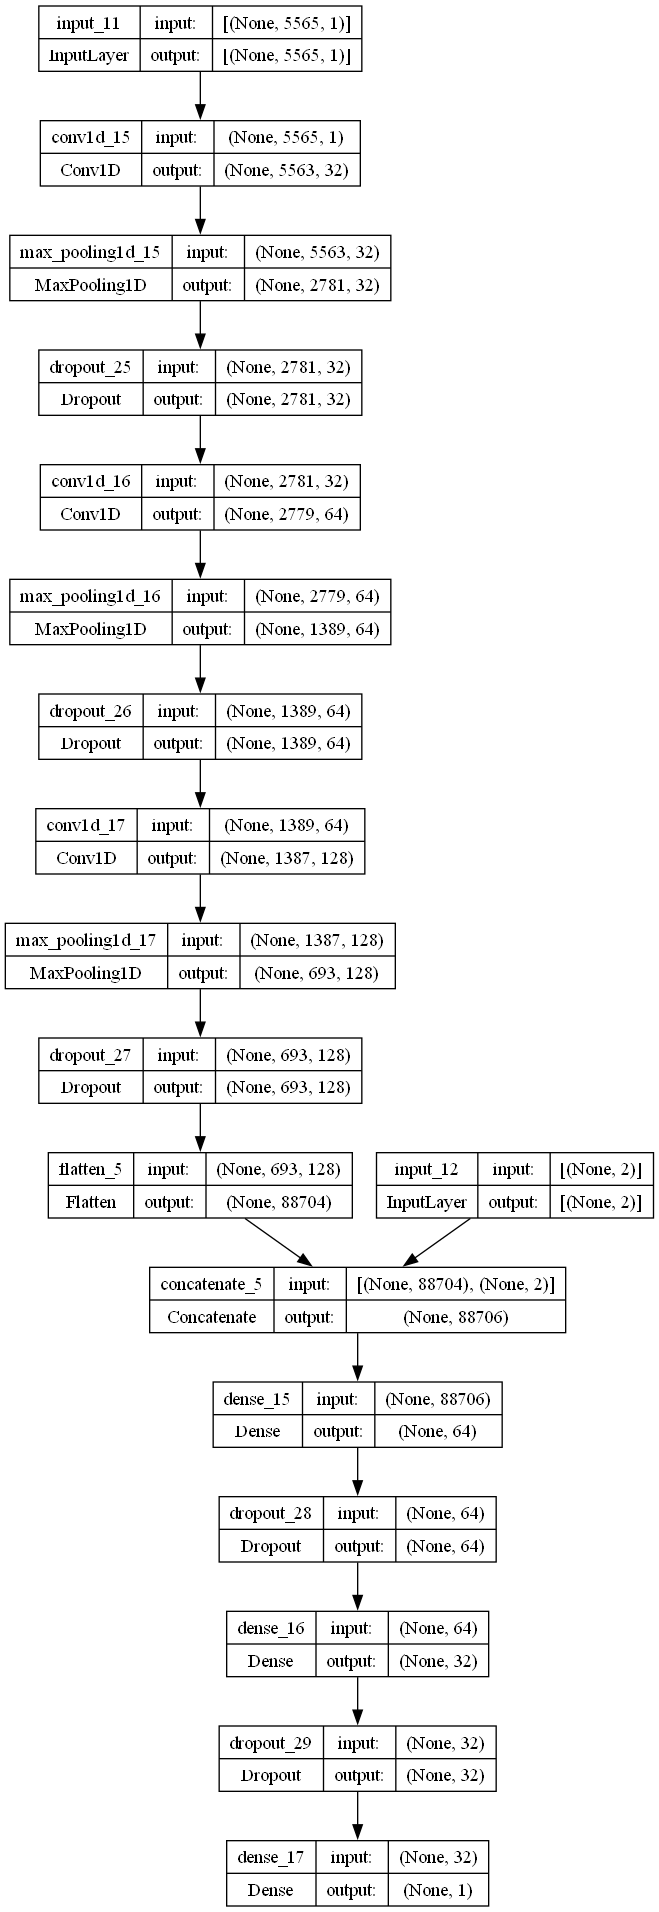

In [41]:

# Define CNN for seismogram input
def create_seismogram_model():
    # Seismogram input
    seismogram_input = Input(shape=(5565, 1))
    
    # Convolutional layers for seismogram data
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(seismogram_input)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # Flatten the convolutional layer output
    seismogram_output = Flatten()(x)
    
    return seismogram_input, seismogram_output

# Define auxiliary inputs for standard deviation and other values
def create_aux_input():
    # Auxiliary input (standard deviation, other values)
    aux_input = Input(shape=(2,))
    return aux_input

# Combine seismogram and auxiliary inputs
def create_combined_model():
    # Get seismogram and auxiliary models
    seismogram_input, seismogram_output = create_seismogram_model()
    aux_input = create_aux_input()
    
    # Concatenate seismogram and auxiliary inputs
    combined = concatenate([seismogram_output, aux_input])
    
    # Fully connected layers
    x = Dense(64, activation='relu')(combined)
    x = Dropout(0.4)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    # Output layer (binary classification)
    output = Dense(1, activation='sigmoid')(x)
    
    # Define the complete model
    model = Model(inputs=[seismogram_input, aux_input], outputs=output)
    
    # Compile the model
    opt = Adam(learning_rate=0.0002)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model
model = create_combined_model()

# Summary of the model
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)


In [42]:
import numpy as np
# Load the data back into your new environment
X_data = np.load('./data/lunar/training/catalogs/X_data.npy')
y_labels = np.load('./data/lunar/training/catalogs/y_labels.npy')
aux_data = np.load('./data/lunar/training/catalogs/aux_data.npy')
print(f"Data shape: {X_data.shape}, Labels shape: {y_labels.shape}, Aux data shape: {aux_data.shape}")


Data shape: (589, 5565), Labels shape: (589,), Aux data shape: (589, 2)


In [43]:
# Define class weights to balance true (1) and false (0) events
class_weight = {0: 1.0, 1: 6.7}  # 76 true events, 514 false events, adjust as necessary

# Train the model
history = model.fit(
    [X_data, aux_data],  # Inputs: seismogram data and auxiliary inputs
    y_labels,                  # Labels: true or false event
    epochs=50,          # Number of epochs
    batch_size=32,      # Batch size, change if necessary based on memory limits
    validation_split=0.2,  # Use 20% of the data for validation
    class_weight=class_weight  # Adjust class weights to handle imbalance
)

Epoch 1/50
15/15 [==============================] - 3s 111ms/step - loss: 1.0823 - accuracy: 0.7749 - val_loss: 0.3663 - val_accuracy: 0.8644
Epoch 2/50
15/15 [==============================] - 1s 59ms/step - loss: 0.9624 - accuracy: 0.8217 - val_loss: 0.4207 - val_accuracy: 0.7288
Epoch 3/50
15/15 [==============================] - 1s 58ms/step - loss: 0.8878 - accuracy: 0.8323 - val_loss: 0.3847 - val_accuracy: 0.8390
Epoch 4/50
15/15 [==============================] - 1s 58ms/step - loss: 0.6051 - accuracy: 0.8450 - val_loss: 0.3153 - val_accuracy: 0.8898
Epoch 5/50
15/15 [==============================] - 1s 58ms/step - loss: 0.5854 - accuracy: 0.9002 - val_loss: 0.2792 - val_accuracy: 0.8898
Epoch 6/50
15/15 [==============================] - 1s 58ms/step - loss: 0.5277 - accuracy: 0.8938 - val_loss: 0.2774 - val_accuracy: 0.8898
Epoch 7/50
15/15 [==============================] - 1s 58ms/step - loss: 0.5526 - accuracy: 0.8896 - val_loss: 0.2378 - val_accuracy: 0.8898
Epoch 8/50
1

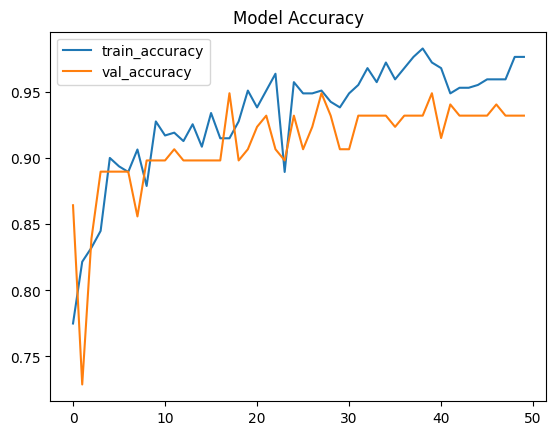

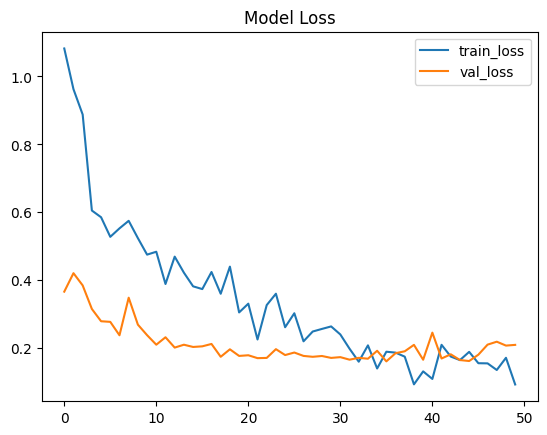

In [44]:
# Visualize training performance
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [45]:
# Example of evaluating on a test set (if you have a separate test set)
# Assuming X_test_seismo and X_test_aux contain test data, and y_test contains test labels
test_loss, test_accuracy = model.evaluate([X_test_seismo, X_test_aux], y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

NameError: name 'X_test_seismo' is not defined